### **IRIS-Project**


#### **1. Import Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("seaborn-v0_8-colorblind")

#### **2. Data Loading and Overview**


In [3]:
data = pd.read_csv("../data/IRIS.csv")

In [4]:
data.sample(n=5, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### **3. Exploratory Data Analysis (EDA)**


> Summary statistics for numerical and categorical features


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data.describe(include="O").T

,count,unique,top,freq
species,150,3,Iris-setosa,50


In [9]:
species_value_count = data["species"].value_counts()
species_value_count

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

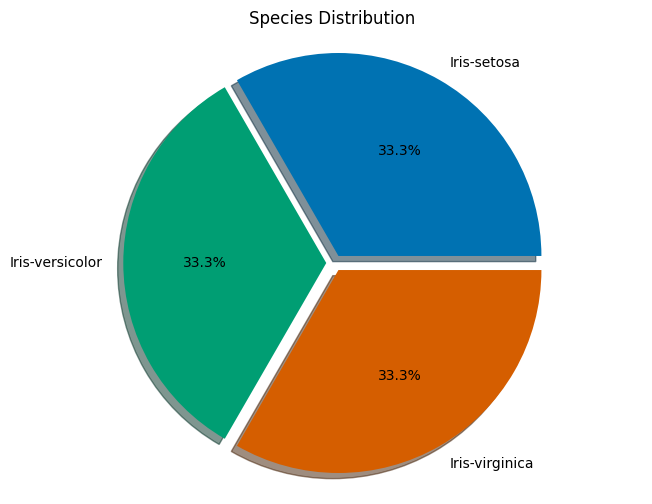

In [10]:
plt.figure(figsize=(8, 6))
plt.pie(
    x=species_value_count.values,
    labels=species_value_count.index,
    autopct="%1.1f%%",
    explode=np.ones(len(species_value_count)) * 0.04,
    shadow=True,
)
plt.title("Species Distribution")
plt.axis("equal")
plt.show()

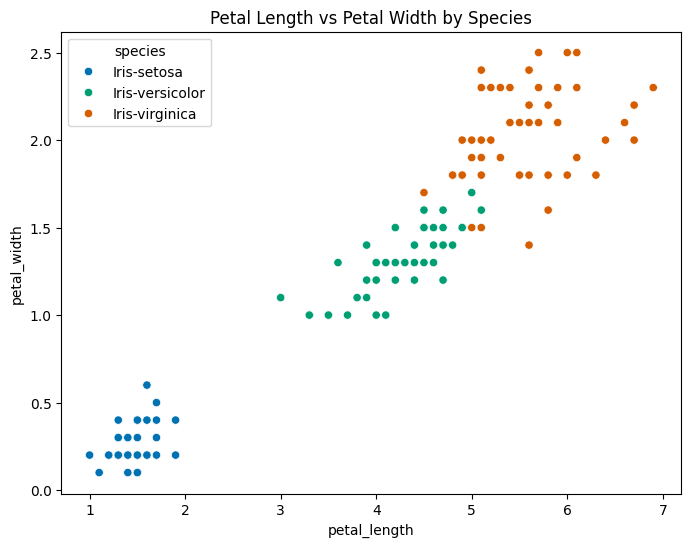

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs Petal Width by Species")
plt.show()

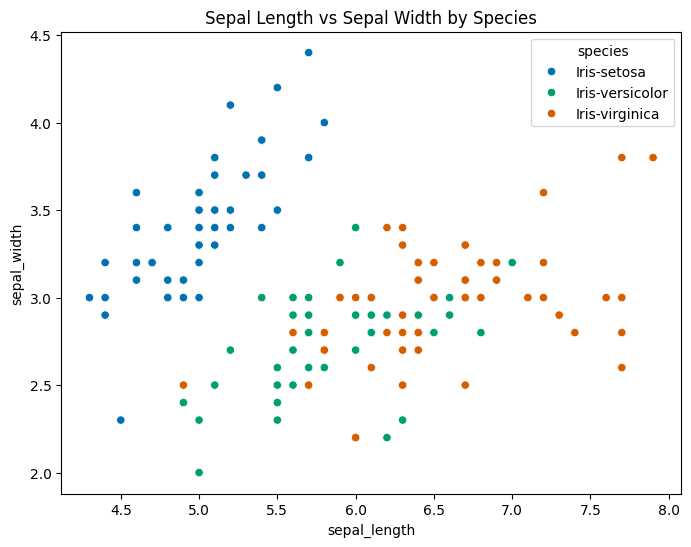

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data, x="sepal_length", y="sepal_width", hue="species")
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()

#### **4. Data Preprocessing**


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
data.sample(n=3, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica


In [15]:
target_labels = data["species"].unique()
target_labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
label_encoder = LabelEncoder()
data["species"] = label_encoder.fit_transform(data["species"])

In [17]:
data.sample(n=3, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2


In [18]:
X = data.drop("species", axis=1).values
y = data["species"].values

**Splitting the data into training and testing sets**


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
X.shape, X_train.shape, X_test.shape

((150, 4), (120, 4), (30, 4))

#### **5. Logistic Regression Model**


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

**Evaluate_Model**


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
def evaluate_model(model, X_test, y_test, target_labels="auto"):
    y_pred = model.predict(X_test)

    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        square=True,
        xticklabels=target_labels,
        yticklabels=target_labels,
    )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Logistic Regression Performance
Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



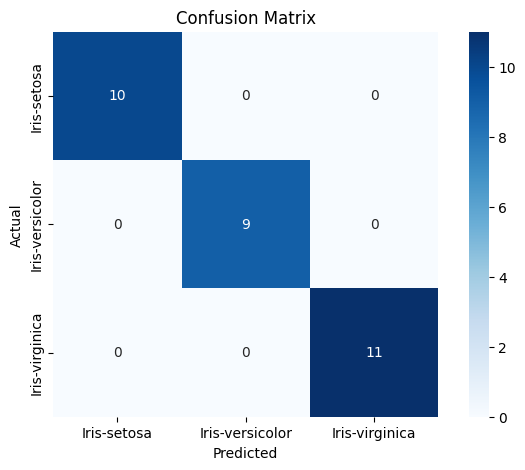

In [25]:
print("Logistic Regression Performance")
evaluate_model(logistic_reg_model, X_test, y_test, target_labels)

#### **6. Support Vector Classifier (SVC) with Hyperparameter Tuning**


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [27]:
svc_model = SVC(random_state=42)

param_grid = {
    "C": [0.01, 0.1, 1, 10, 50, 100],
    "kernel": ["poly", "rbf"],
    "gamma": ["scale", "auto", 0.01, 1, 10],
}

random_search = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring="accuracy",
    verbose=1,
    random_state=42,
    return_train_score=True,
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=50,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100],
                                        'gamma': ['scale', 'auto', 0.01, 1, 10],
                                        'kernel': ['poly', 'rbf']},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [28]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 50}

In [29]:
best_svc_model = random_search.best_estimator_

In [30]:
best_svc_model.fit(X_train, y_train)

SVC(C=50, gamma=0.01, random_state=42)

Support Vector Classifier (SVC) Performance
Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



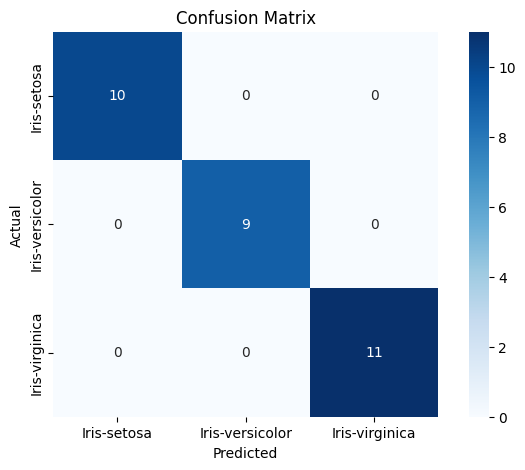

In [31]:
print("Support Vector Classifier (SVC) Performance")
evaluate_model(best_svc_model, X_test, y_test, target_labels)

#### **7. Save Model**


In [32]:
import pickle

with open("../models/IRIS_Model.pkl", "wb") as file:
    pickle.dump(best_svc_model, file)

#### **8. Load Model**


In [33]:
import pickle

try:
    with open("../models/IRIS_Model.pkl", "rb") as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: The model file was not found.")

Model loaded successfully.


**Predict species for a new data point**


In [34]:
label_encoder.inverse_transform(loaded_model.predict([[4.2, 3.7, 1.8, 0.3]]))[0]

'Iris-setosa'